# Analysis of the Predicted HP-PPI Network

Network analysis on the human-*Streptococcus pneumoniae* strain D39 protein-protein interaction network with NetworkX module

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
# Set up directories
parent_dir = os.path.dirname(os.getcwd())
dir_in = dir_out = os.path.join(parent_dir, 'data', 'prediction')

In [3]:
# Load predicted network as DataFrame
f_in = os.path.join(dir_in, 'predicted_interactions.tsv')
df = pd.read_csv(f_in, sep='\t')

# Get sets of unique proteins from each organism
pathogen_proteins = set(df.Pathogen_Protein)
human_proteins = set(df.Human_Protein)

print('Loaded %i interactions involving %i STRP2 proteins and %i human proteins\n'\
      % (len(df), len(pathogen_proteins), len(human_proteins)))
df.head()

Loaded 9835 interactions involving 42 STRP2 proteins and 374 human proteins



,Pathogen_Protein,Human_Protein
0,ENO_STRP2,FCAR_HUMAN
1,ENO_STRP2,FCG2B_HUMAN
2,ENO_STRP2,FCERG_HUMAN
3,ENO_STRP2,FCGRB_HUMAN
4,ENO_STRP2,CLUS_HUMAN


## Create graph of protein interactions

In [4]:
# Initialize a bipartite graph 
B = nx.Graph()

# Add proteins as nodes with a bipartite attribute
B.add_nodes_from(pathogen_proteins, bipartite=0)
B.add_nodes_from(human_proteins, bipartite=1)

# Add interactions as edges between nodes
B.add_edges_from(df.values)

In [5]:
# Analyze topological properties
properties = {
    'Degree_centrality': bipartite.degree_centrality,
    'Betweenness_centrality': bipartite.betweenness_centrality,
    'Clustering': bipartite.clustering
}

# Create an empty DataFrame to store properties of pathogen proteins
df = pd.DataFrame([], index=pathogen_proteins)
for prop, func in properties.items():
    props = func(B, nodes=pathogen_proteins)
    df_prop = pd.DataFrame.from_dict(props, orient='index', columns=[prop])
    
    # Obtain only pathogen proteins
    df_prop = df_prop[df_prop.index.str.contains('STRP2')]
    
    # Concatenate to the empty DataFrame
    df = pd.concat([df, df_prop], axis=1, sort=False)

In [6]:
# Examine top-scoring properties
for prop in properties.keys():
    middle = df[prop].mean()
    middle
    len(df[df[prop] > middle])
    print('Top 15 proteins by %s:' % prop)
    
    df[prop].sort_values(ascending=False)[:15]
    print('\n')

0.6261140819964354

40

Top 15 proteins by Degree_centrality:


A0A0H2ZMI1_STRP2    1.000000
A0A0H2ZL64_STRP2    0.772727
A0A0H2ZN79_STRP2    0.727273
A0A0H2ZRA8_STRP2    0.719251
A0A0H2ZMW1_STRP2    0.663102
A0A0H2ZNT8_STRP2    0.657754
ENO_STRP2           0.655080
A0A0H2ZN64_STRP2    0.647059
GATA_STRP2          0.647059
A0A0H2ZNK2_STRP2    0.647059
A0A0H2ZNY6_STRP2    0.647059
A0A0H2ZQR4_STRP2    0.647059
A0A0H2ZN89_STRP2    0.647059
TACY_STRP2          0.647059
A0A0H2ZR25_STRP2    0.647059
Name: Degree_centrality, dtype: float64

0.020970038998549215

4

Top 15 proteins by Betweenness_centrality:


A0A0H2ZMI1_STRP2    0.434146
A0A0H2ZL64_STRP2    0.065889
A0A0H2ZN79_STRP2    0.034211
A0A0H2ZRA8_STRP2    0.030613
A0A0H2ZMW1_STRP2    0.012514
A0A0H2ZNT8_STRP2    0.011194
ENO_STRP2           0.010648
A0A0H2ZN64_STRP2    0.009261
GATA_STRP2          0.009261
A0A0H2ZNK2_STRP2    0.009261
A0A0H2ZNY6_STRP2    0.009261
A0A0H2ZQR4_STRP2    0.009261
A0A0H2ZN89_STRP2    0.009261
TACY_STRP2          0.009261
A0A0H2ZR25_STRP2    0.009261
Name: Betweenness_centrality, dtype: float64

0.869986623184372

36

Top 15 proteins by Clustering:


A0A0H2ZR63_STRP2    0.926541
A0A0H2ZLD8_STRP2    0.926541
A0A0H2ZND3_STRP2    0.926541
A0A0H2ZPC8_STRP2    0.926541
A0A0H2ZLL3_STRP2    0.926541
A0A0H2ZM01_STRP2    0.926541
A0A0H2ZLS0_STRP2    0.926541
A0A0H2ZR12_STRP2    0.926541
A0A0H2ZP12_STRP2    0.926541
A0A0H2ZN35_STRP2    0.926541
A0A0H2ZM17_STRP2    0.926541
A0A0H2ZNM5_STRP2    0.926541
A0A0H2ZQY4_STRP2    0.926541
A0A0H2ZM64_STRP2    0.926541
A0A0H2ZPA7_STRP2    0.926541
Name: Clustering, dtype: float64

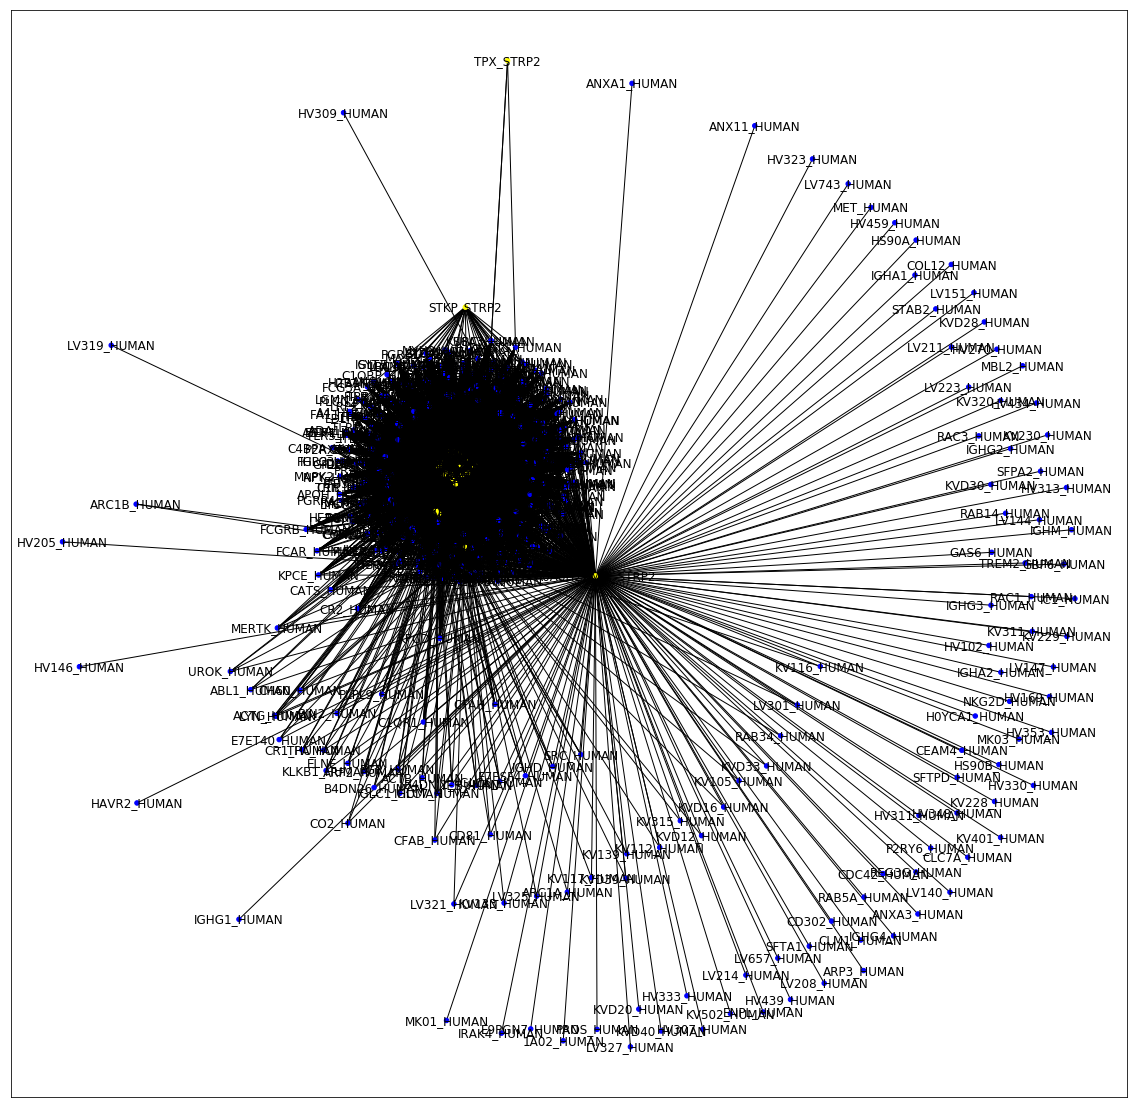

In [7]:
# Visualize the network
color_map = []

for node in B:
    if node in pathogen_proteins:
        color_map.append('yellow')
    elif node in human_proteins:
        color_map.append('blue')

_ = plt.figure(figsize=(20, 20))
nx.draw_networkx(B, node_color=color_map, node_size=20)